In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fraud-call-india-dataset/fraud_call.file


In [2]:
import numpy as np
import csv

In [3]:
import pandas as pd
df = pd.read_csv("../input/fraud-call-india-dataset/fraud_call.file",sep='\t',names=['type','clue'])

In [4]:
df.head()

,type,clue
0,fraud,"hello, i m bank manager of SBI, ur debit card ..."
1,fraud,Todays Vodafone numbers ending with 4882 are s...
2,normal,Please don't say like that. Hi hi hi
3,normal,Thank you!
4,normal,Oh that was a forwarded message. I thought you...


In [5]:
df['type'].value_counts()

normal    5287
fraud      638
Name: type, dtype: int64

**There are totally 638 fraud calls**

Text(0, 0.5, 'count')

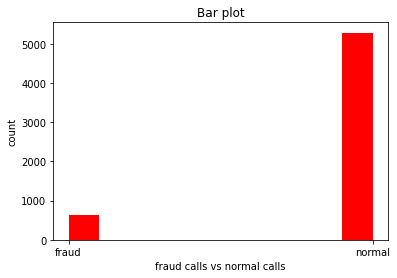

In [6]:
import matplotlib.pyplot as plt

plt.hist(df['type'],color = 'r')
plt.title("Bar plot")
plt.xlabel("fraud calls vs normal calls")
plt.ylabel("count")

**This shows that the fraud calls occurs very rarely according to this dataset that is once in a while. Our job is to find those correctly**

**Creating Model**

In [7]:
import seaborn as sns
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [8]:
df['type'].replace(["fraud","normal"],[1,0],inplace=True)
df.head(5)

,type,clue
0,1,"hello, i m bank manager of SBI, ur debit card ..."
1,1,Todays Vodafone numbers ending with 4882 are s...
2,0,Please don't say like that. Hi hi hi
3,0,Thank you!
4,0,Oh that was a forwarded message. I thought you...


**Label Encoder helps to convert the strings to numeric values**

In [9]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
label = le.fit_transform(df['clue'])
label

array([5434, 4350, 3513, ..., 5538, 5539, 5428])

In [10]:
label = label.reshape(-1,1)

In [11]:
X = label
Y = df['type']
X_train,X_test,Y_train,Y_test = train_test_split(X,Y)

model = LogisticRegression()
model.fit(X_train,Y_train)

y_pred = model.predict(X_test)
print(X_test)
print(y_pred)

[[3735]
 [ 781]
 [1788]
 ...
 [5466]
 [2801]
 [4340]]
[0 0 0 ... 0 0 0]


**Calculating Accuracy of the model**

In [12]:
from sklearn import metrics
from sklearn.metrics import classification_report
print("Accuracy: ",metrics.accuracy_score(Y_test,y_pred))
print("Precision: ",metrics.precision_score(Y_test,y_pred,zero_division = 1))

Accuracy:  0.8960863697705803
Precision:  1.0
